# Titanic Survival Prediction Project

In this project, using the the data on passengers, we try to predict the survival of each individual.
Dataset is provided by Kaggle.

We would first like to clean the given data, then using the descriptive statistics and visualizations, we select the appropriate features for the training the model.

Also, we would be comparing the performances of various ML models.

After evaluation of the model, more feature engineering would be introduced if needed.

### Importing Data and Cleaning

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [50]:
train_path = "D:/Coursera/Kaggle/Datasets/titanic/train.csv"
test_path = "D:/Coursera/Kaggle/Datasets/titanic/test.csv"


train_data = pd.read_csv(train_path, index_col = 'PassengerId')
test_data = pd.read_csv(test_path, index_col = 'PassengerId')


In [51]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [52]:
train_data.shape

(891, 11)

#### Data Types in Columns

In [53]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [54]:
# Finding unique values

train_data.nunique()

Survived      2
Pclass        3
Name        891
Sex           2
Age          88
SibSp         7
Parch         7
Ticket      681
Fare        248
Cabin       147
Embarked      3
dtype: int64

#### Checking for missing values in the data:

In [55]:
train_data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [56]:
# Statistics of Age column

train_data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [57]:
train_data['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [58]:
train_data.groupby(['Cabin']).size().sort_values(ascending = False)

Cabin
C23 C25 C27    4
G6             4
B96 B98        4
F2             3
C22 C26        3
              ..
C101           1
B94            1
B86            1
B82 B84        1
T              1
Length: 147, dtype: int64

#### As 687 out of 891 cabin data is missing, the column can be dropped

In [59]:
train_data.drop('Cabin', axis = 1, inplace = True)

#### Replacing missing values with most frequent for Embarked and median for Age

In [60]:


mode_emb = train_data['Embarked'].mode()[0]
median_age = train_data['Age'].median()

train_data['Embarked'].replace(np.nan, mode_emb, inplace = True)
train_data['Age'].replace(np.nan, median_age, inplace = True)


In [61]:
train_data.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

Now the missing values are handled.

## Selecting Features by Finding Relationships

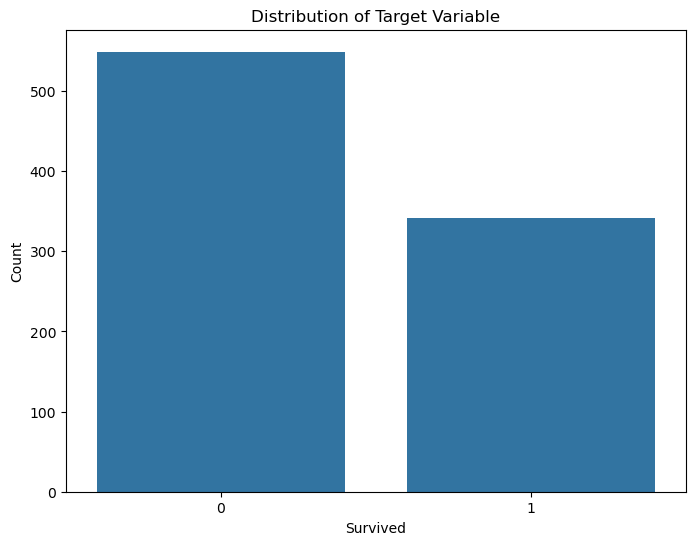

In [62]:
# Plot the distribution of the target variable


plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', data=train_data)
plt.title('Distribution of Target Variable')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()



### Sex and Survival

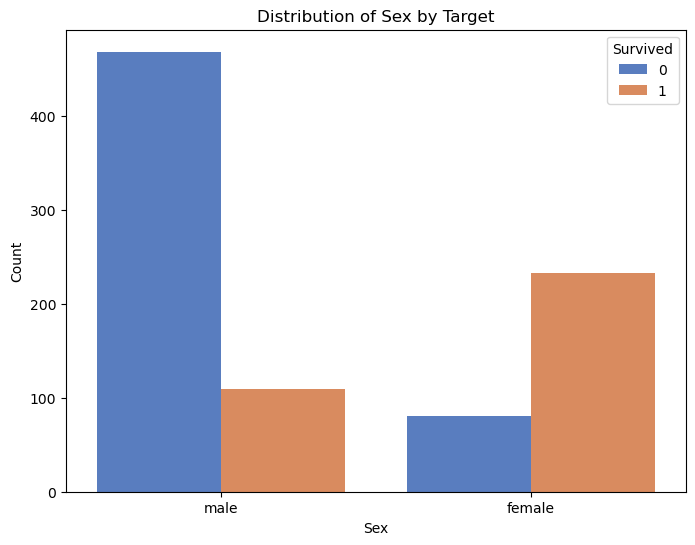

In [63]:
survived_sex = train_data.groupby('Sex')['Survived'].mean()

# Plotting count distribution by target


plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', hue='Survived', data=train_data, palette = 'muted')
plt.title('Distribution of Sex by Target')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()


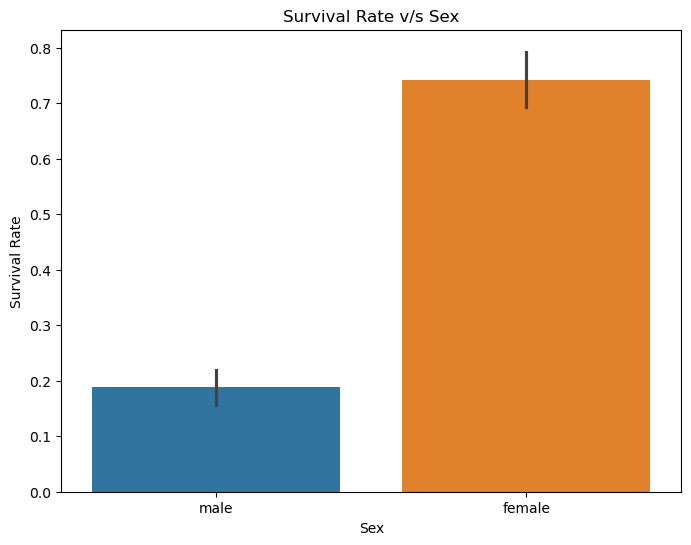

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


In [64]:
# Plotting survival rate by sex

plt.figure(figsize=(8,6))
sns.barplot(x = 'Sex', y = 'Survived', data = train_data, hue = 'Sex', legend = False)
plt.title('Survival Rate v/s Sex')
plt.ylabel('Survival Rate')
plt.xlabel('Sex')
plt.show()
print(survived_sex)

In [65]:
# Running t-test to compare

train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})

survived = train_data[train_data['Survived']==1]['Sex']
not_survived = train_data[train_data['Survived']==0]['Sex']

sex_stat, sex_p_value = stats.ttest_ind(survived, not_survived)
print(f"Sex t-statistic : {sex_stat}, P-Value : {sex_p_value}")

if sex_p_value < 0.05:
    print("There is a significant difference in the 'Sex' feature between those who survived and those who did not.")
else:
    print("There is no significant difference in the 'Sex' feature between those who survived and those who did not.")

Sex t-statistic : 19.297816550123354, P-Value : 1.4060661308802594e-69
There is a significant difference in the 'Sex' feature between those who survived and those who did not.


Clearly, __Sex__ will have an effect in the target prediction

### Ticket Class (Pclass) and Survival

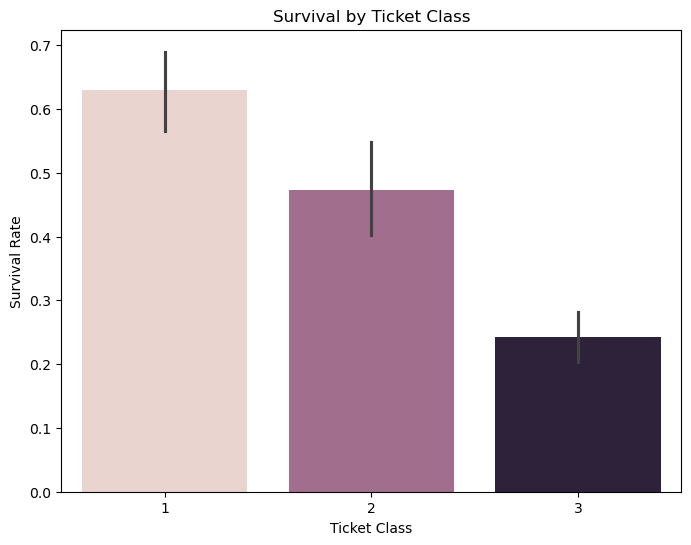

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


In [66]:
survived_pclass = train_data.groupby('Pclass')['Survived'].mean()

# Visualizing the Relation

plt.figure(figsize = (8,6))
sns.barplot(x = 'Pclass', y = 'Survived', data = train_data, hue = 'Pclass', legend = False)
plt.title('Survival by Ticket Class')
plt.ylabel('Survival Rate')
plt.xlabel('Ticket Class')
plt.show()
print(survived_pclass)


In [67]:
# T-test
# Running t-test to test whether there is a significant difference in Pclass feature


survived = train_data[train_data['Pclass']==1]['Survived']
not_survived = train_data[train_data['Pclass']==3]['Survived']

pclass_stat, pclass_p_value = stats.ttest_ind(survived, not_survived)
print(f"Pclass t-statistic : {pclass_stat}, P-Value : {pclass_p_value}")

if pclass_p_value < 0.05:
    print("There is a significant difference in the 'Pclass' feature between those who survived and those who did not.")
else:
    print("There is no significant difference in the 'Pclass' feature between those who survived and those who did not.")

Pclass t-statistic : 10.623796623966948, P-Value : 1.4803959119909571e-24
There is a significant difference in the 'Pclass' feature between those who survived and those who did not.


Passengers of higher class clearly have higher survival rate.
So there is clearly a relationship between the variables.

Therefore __Ticket Class__ would also be a critical feature in survival prediction

### Survival by Embarkation Point

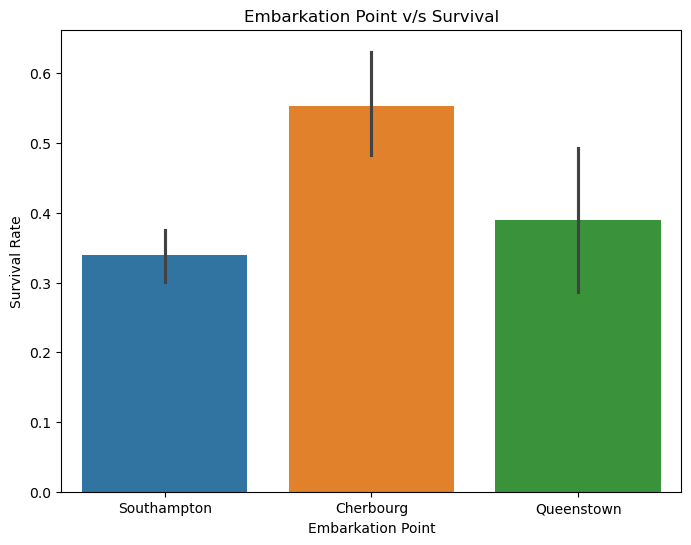

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64


In [68]:
survived_embarked = train_data.groupby('Embarked')['Survived'].mean()




plt.figure(figsize=(8, 6))
sns.barplot(hue='Embarked', x = 'Embarked', y='Survived', data=train_data)
plt.title('Embarkation Point v/s Survival')
plt.xlabel('Embarkation Point')
plt.ylabel('Survival Rate')
plt.xticks(['S', 'C', 'Q'], ['Southampton', 'Cherbourg', 'Queenstown'])
plt.show()

print(survived_embarked)

In [69]:
# T-test

cherbourg = train_data[train_data['Embarked'] == 'C']['Survived'].dropna()
southampton = train_data[train_data['Embarked'] == 'S']['Survived'].dropna()

# Step 3: Perform the t-test on survival rates between Cherbourg and Southampton
Embarked_stat, Embarked_p_value = stats.ttest_ind(cherbourg, southampton)

print(f"Embarkation point t-statistic : {Embarked_stat}, P-Value : {Embarked_p_value}")

if Embarked_p_value < 0.05:
    print("There is a significant difference in the 'Embarkation point' feature between those who survived and those who did not.")
else:
    print("There is no significant difference in the 'Embarkation point' feature between those who survived and those who did not.")

Embarkation point t-statistic : 5.172645618768915, P-Value : 2.9097067443725114e-07
There is a significant difference in the 'Embarkation point' feature between those who survived and those who did not.


### Age vs Survival

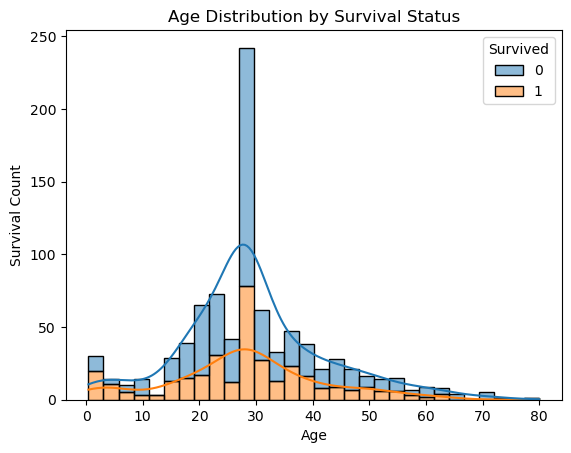

In [70]:
sns.histplot(x='Age', hue='Survived', data=train_data, multiple="stack", kde=True)
plt.xlabel("Age")
plt.ylabel("Survival Count")
plt.title("Age Distribution by Survival Status")
plt.show()

Binning of the Age data into groups might be more easier to understand.

In [71]:
train_data.Age.describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

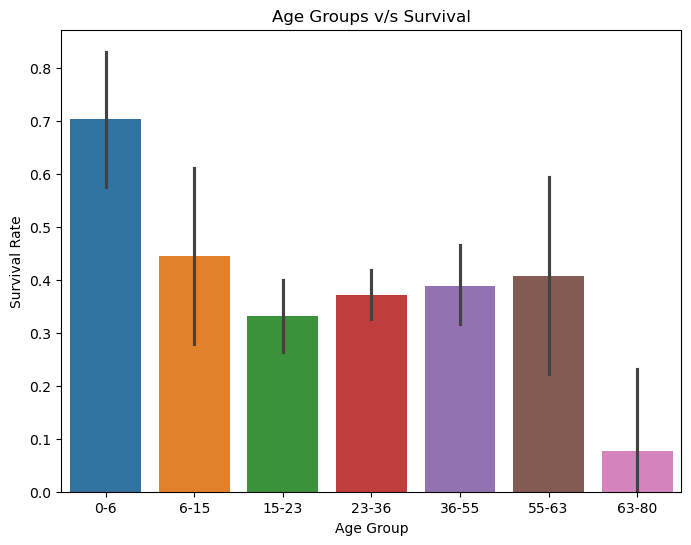

  Age_group  Survived
0       0-6  0.702128
1      6-15  0.444444
2     15-23  0.331288
3     23-36  0.371111
4     36-55  0.387097
5     55-63  0.407407
6     63-80  0.076923


In [72]:
# Age
#train_data['Age_group'] = pd.cut(train_data['Age'], 
#                                 bins = [0,10,20,30,40,50,60,70,80],
#                                 labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80'], 
#                                 include_lowest = True)
# Age
#train_data['Age_group'] = pd.cut(train_data['Age'], 
#                                 bins = [0,20,40,60,80],
#                                 labels = ['0-20','20-40','40-60', '60-80'], 
#                                 include_lowest = True)
train_data['Age_group'] = pd.cut(train_data['Age'], 
                                 bins = [0,6,15,23,36,55,63,80],
                                 labels = ['0-6', '6-15','15-23','23-36','36-55','55-63','63-80'], 
                                 include_lowest = True)

survival_rate_age = train_data.groupby('Age_group', observed = True)['Survived'].mean().reset_index()

# Visualizing

plt.figure(figsize = (8,6))
sns.barplot(x = 'Age_group', y = 'Survived', hue = 'Age_group', data = train_data)
plt.title("Age Groups v/s Survival")
plt.xlabel("Age Group")
plt.ylabel("Survival Rate")
plt.show()

print(survival_rate_age)

In [73]:
# Converting groups into numeric values for calculating corr coeff

age_group_numeric = train_data['Age_group'].cat.codes

corr, p_value = stats.pearsonr(age_group_numeric, train_data['Survived'])
print(f"Correlation coeff between age groups and Survival :{corr}, P-value : {p_value}")

Correlation coeff between age groups and Survival :-0.10606108563099118, P-value : 0.0015223695623983648


In [74]:
# Binned age data have  more correlation than raw data

## Fare vs Survival

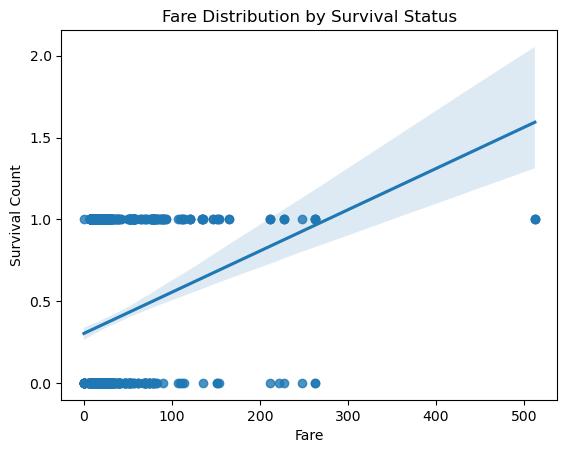

In [75]:
#sns.kdeplot(x='Fare', hue='Survived', data=train_data)
sns.regplot(x='Fare', y='Survived', data = train_data)
#sns.scatterplot(x='Fare', y='Age', hue='Survived', data=train_data)
plt.xlabel("Fare")
plt.ylabel("Survival Count")
plt.title("Fare Distribution by Survival Status")
plt.show()

In [76]:
fare_corr, fare_p_value = stats.pearsonr(train_data['Fare'], train_data['Survived'])
print(f"Correlation coeff between Fare and Survival :{fare_corr}, P-value : {fare_p_value}")

Correlation coeff between Fare and Survival :0.2573065223849624, P-value : 6.120189341924608e-15


In [77]:
zero_fare_count = train_data[train_data['Fare'] == 0].shape[0]
train_data[train_data['Fare'] == 0].groupby('Pclass')['Fare'].mean()

Pclass
1    0.0
2    0.0
3    0.0
Name: Fare, dtype: float64

In [78]:
train_data.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

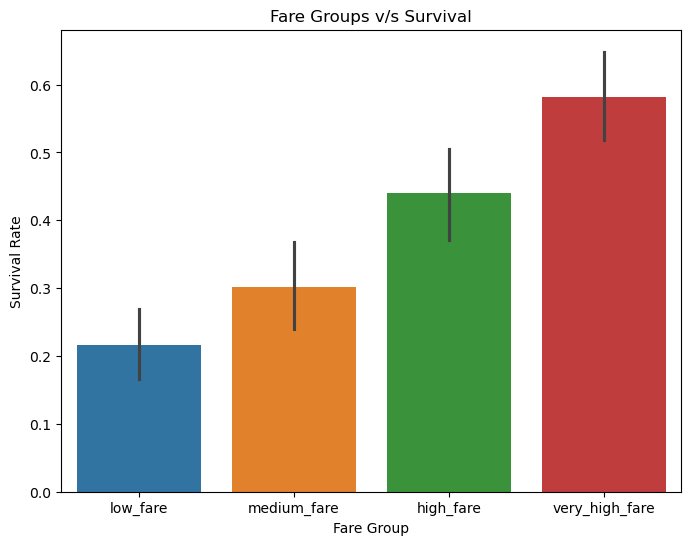

       Fare_group  Survived
0        low_fare  0.215768
1     medium_fare  0.301020
2       high_fare  0.439655
3  very_high_fare  0.581081


In [79]:
# Trying binning on Fare

train_data['Fare_group'] = pd.cut(train_data['Fare'],
                               bins = [0,8, 14, 31,513],
                                  labels = ['low_fare', 'medium_fare', 'high_fare', 'very_high_fare'],
                               include_lowest = True)

survival_rate_fare = train_data.groupby('Fare_group', observed = True)['Survived'].mean().reset_index()

# Visualizing

plt.figure(figsize = (8,6))
sns.barplot(x = 'Fare_group', y = 'Survived', hue = 'Fare_group', data = train_data)
plt.title("Fare Groups v/s Survival")
plt.xlabel("Fare Group")
plt.ylabel("Survival Rate")
plt.show()

print(survival_rate_fare)

In [80]:
# Converting groups into numeric values for calculating corr coeff

fare_group_numeric = train_data['Fare_group'].cat.codes

fare_gp_corr, fare_gp_p_value = stats.pearsonr(fare_group_numeric, train_data['Survived'])
print(f"Correlation coeff between age groups and Survival :{fare_gp_corr}, P-value : {fare_gp_p_value}")

Correlation coeff between age groups and Survival :0.28665709465738465, P-value : 2.5826084457337072e-18


### Pearson Coeffecients of Numerical Columns

In [81]:
num_cols = [col for col in train_data.columns if train_data[col].dtype in ('int64', 'float64')]
num_df = train_data[num_cols]

pearson_dic = {i: stats.pearsonr(num_df[i], num_df['Survived']) for i in num_df.columns}
pearson_dic

{'Survived': PearsonRResult(statistic=0.9999999999999999, pvalue=0.0),
 'Pclass': PearsonRResult(statistic=-0.3384810359610153, pvalue=2.537047387981485e-25),
 'Sex': PearsonRResult(statistic=0.5433513806577551, pvalue=1.4060661308803917e-69),
 'Age': PearsonRResult(statistic=-0.06491041993052588, pvalue=0.05276068847585567),
 'SibSp': PearsonRResult(statistic=-0.03532249888573556, pvalue=0.29224392869829624),
 'Parch': PearsonRResult(statistic=0.08162940708348347, pvalue=0.014799245374727947),
 'Fare': PearsonRResult(statistic=0.2573065223849624, pvalue=6.120189341924608e-15)}

In [82]:
selected_variables = {
    var: result for var, result in pearson_dic.items()
    if result.pvalue < 0.05 and abs(result.statistic) > 0.05}
selected_variables

{'Survived': PearsonRResult(statistic=0.9999999999999999, pvalue=0.0),
 'Pclass': PearsonRResult(statistic=-0.3384810359610153, pvalue=2.537047387981485e-25),
 'Sex': PearsonRResult(statistic=0.5433513806577551, pvalue=1.4060661308803917e-69),
 'Parch': PearsonRResult(statistic=0.08162940708348347, pvalue=0.014799245374727947),
 'Fare': PearsonRResult(statistic=0.2573065223849624, pvalue=6.120189341924608e-15)}

### Relatives Data vs Survival

In [83]:


train_data['Relatives'] = train_data['SibSp'] + train_data['Parch']
stats.pearsonr(train_data['Relatives'], train_data['Survived'])

PearsonRResult(statistic=0.01663898928274522, pvalue=0.6198911221343032)

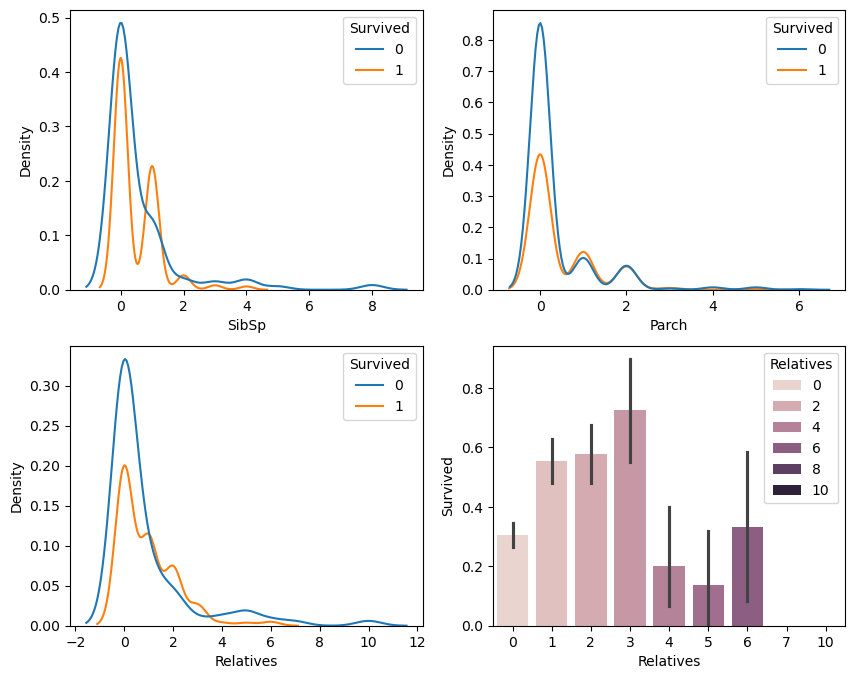

In [84]:
# plots for SibSp and Parch

plt.figure(figsize=(10,8))

# plot for SibSp
plt.subplot(2,2,1)
sns.kdeplot(data = train_data, x = 'SibSp', hue = 'Survived')



# Plot for Parch
plt.subplot(2,2,2)
sns.kdeplot(x='Parch', hue='Survived', data=train_data)



# Plot for Relatives
plt.subplot(2,2,3)
sns.kdeplot(x='Relatives', hue='Survived', data=train_data)


# Plot for Relatives
plt.subplot(2,2,4)
sns.barplot(x = 'Relatives', y = 'Survived', hue = 'Relatives',data = train_data)

plt.show()

In [85]:
num_cols = [col for col in train_data.columns if train_data[col].dtype in ('int64', 'float64')]
num_df = train_data[num_cols]
# Calculate the correlation matrix
corr_matrix = num_df.corr()

corr_matrix

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Relatives
Survived,1.000000,-0.338481,0.543351,-0.064910,-0.035322,0.081629,0.257307,0.016639
Pclass,-0.338481,1.000000,-0.131900,-0.339898,0.083081,0.018443,-0.549500,0.065997
Sex,0.543351,-0.131900,1.000000,-0.081163,0.114631,0.245489,0.182333,0.200988
Age,-0.064910,-0.339898,-0.081163,1.000000,-0.233296,-0.172482,0.096688,-0.245619
SibSp,-0.035322,0.083081,0.114631,-0.233296,1.000000,0.414838,0.159651,0.890712
Parch,0.081629,0.018443,0.245489,-0.172482,0.414838,1.000000,0.216225,0.783111
Fare,0.257307,-0.549500,0.182333,0.096688,0.159651,0.216225,1.000000,0.217138
Relatives,0.016639,0.065997,0.200988,-0.245619,0.890712,0.783111,0.217138,1.000000


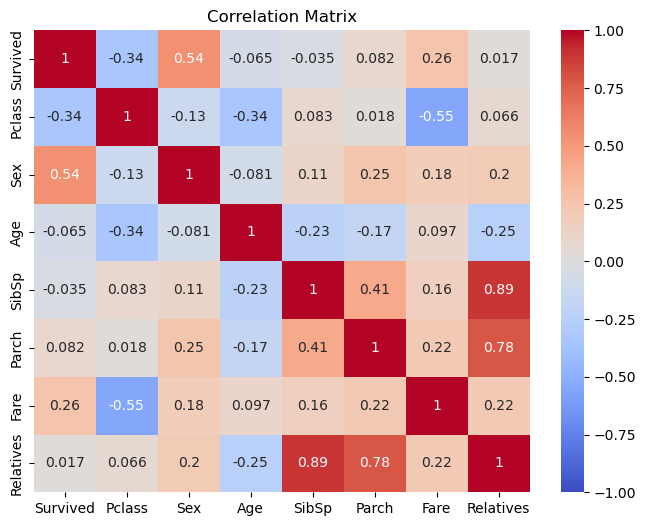

In [86]:
# Plot the correlation matrix
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

By examining the visible relations, correlation coefficients, p_values, and later comparative performance studies from model running, we select the following features:

In [87]:
features = ['Pclass', 'Parch', 'Age_group', 'Fare_group', 'Embarked', 'Sex', 'Fare', 'Relatives']

## Hyperparameter Tuning and Comparison of Different Models 

In [88]:
import pandas as pd
import numpy as np
from scipy import stats
import warnings

# Visulisation
from matplotlib import pyplot as plt
import seaborn as sns

# Importing Metrics
from sklearn.metrics import mean_absolute_error, accuracy_score, r2_score

# Importing model selectiona and preprocessing tools
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier



In [89]:
# Importing Data
train_path = "D:/Coursera/Kaggle/Datasets/titanic/train.csv"
test_path = "D:/Coursera/Kaggle/Datasets/titanic/test.csv"

train_data = pd.read_csv(train_path, index_col = 'PassengerId')
test_data = pd.read_csv(test_path, index_col = 'PassengerId')


# Funtion for confusion matrix plotting
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix for the prediction analysis"
    
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['not survived', 'survived']); ax.yaxis.set_ticklabels(['not survived', 'survived']) 
    plt.show() 
    
# Turning Off Warnings

warnings.filterwarnings('ignore')

In [90]:

# Engineered Features

# Missing value handling
train_data['Age'].replace(np.nan, train_data['Age'].mean(), inplace = True)
test_data['Age'].replace(np.nan, test_data['Age'].mean(), inplace = True)

train_data['Embarked'].replace(np.nan, train_data['Embarked'].mode()[0], inplace = True)
test_data['Embarked'].replace(np.nan, test_data['Embarked'].mode()[0], inplace = True)

train_data['Fare'].replace(np.nan, train_data['Fare'].median(), inplace = True)
test_data['Fare'].replace(np.nan, test_data['Fare'].median(), inplace = True)

# Age
train_data['Age_group'] = pd.cut(train_data['Age'], 
                                 bins = [0,6,15,23,36,55,63,80],
                                 labels = ['0-6', '6-15','15-23','23-36','36-55','55-63','63-80'], 
                                 include_lowest = True)

test_data['Age_group'] = pd.cut(test_data['Age'], 
                                 bins = [0,6,15,23,36,55,63,80],
                                 labels = ['0-6', '6-15','15-23','23-36','36-55','55-63','63-80'], 
                                 include_lowest = True)

#Fare
train_data['Fare_group'] = pd.cut(train_data['Fare'],
                               bins = [0,8, 14, 31,513],
                                  labels = ['low_fare', 'medium_fare', 'high_fare', 'very_high_fare'],
                               include_lowest = True)

test_data['Fare_group'] = pd.cut(test_data['Fare'],
                               bins = [0,8, 14, 31,513],
                                  labels = ['low_fare', 'medium_fare', 'high_fare', 'very_high_fare'],
                               include_lowest = True)

# Relatives

train_data['Relatives'] = train_data['SibSp'] + train_data['Parch']
test_data['Relatives'] = test_data['SibSp'] + test_data['Parch']



In [91]:
# Feature Selection and Target Separation
features = ['Pclass', 'Parch', 'Age_group', 'Fare_group', 'Embarked', 'Sex', 'Fare', 'Relatives']


X = train_data.copy()
y = X.pop('Survived')

X = X[features]

# Distinguishing Categorical Features and Numerical Features
cat_cols = [col for col in X.columns if X[col].dtypes in ['object', 'category']]
num_cols = [col for col in X.columns if X[col].dtypes in ['int64', 'float64']]

# Encoding categorical features
X = pd.get_dummies(X, columns = cat_cols)

# Standardising Data
scaler =preprocessing.StandardScaler()
X = scaler.fit_transform(X)

# Splitting data into train and test sets
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 0)

### 1. Logistic Regression

Best_Params_for_Log_Reg_Model:  {'C': 0.1, 'class_weight': None, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear', 'tol': 0.0001}
Accuracy of Log Reg Model on Train Set : 0.8118290160543683
Accuracy of Log Reg Model on Validation Data :  0.8212290502793296
Mean Absolute Error of Log Reg Model Predictions :  0.1787709497206704
R2 Score of Log Reg Model :  0.24532279314888017


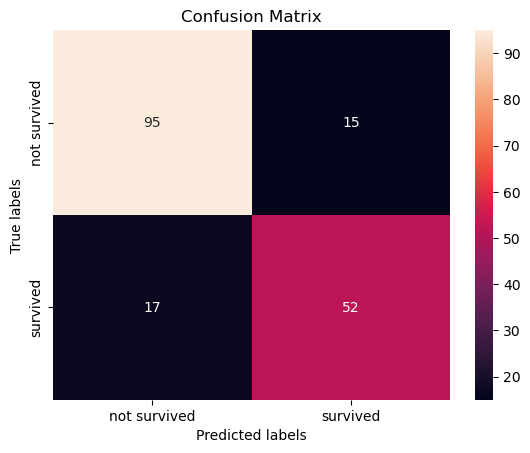

In [92]:
# Hyperparameters for log reg model

lg_param = {'penalty': ['l1', 'l2'],
           'C': [0.001, 0.01, 0.1, 1, 10, 100],
           'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
           'tol': [1e-4, 1e-5, 1e-6],
           'max_iter': [100, 200, 400],
           'class_weight': [None, 'balanced']
           }

# Model
lg_model = LogisticRegression()

# Grid Search CV Object for Hyperparameter tuning
lg_grid = GridSearchCV(estimator = lg_model, param_grid = lg_param, cv=5, n_jobs = 4)

#Fit
lg_grid.fit(X_train, y_train)

#Best parameters for Log_Reg_Model

best_params_lg = lg_grid.best_params_
accuracy_train_lg = lg_grid.best_score_

print("Best_Params_for_Log_Reg_Model: ", best_params_lg)
print("Accuracy of Log Reg Model on Train Set :",accuracy_train_lg)


# Fitting with Best Parameters
best_lr = LogisticRegression(**best_params_lg)
best_lr.fit(X_train, y_train)
y_lg = best_lr.predict(X_val)

# Metrics
accuracy_val_lg = best_lr.score(X_val, y_val)
mae_lg = mean_absolute_error(y_val, y_lg)
r2_lg = r2_score(y_val, y_lg)
print("Accuracy of Log Reg Model on Validation Data : ", accuracy_val_lg)
print("Mean Absolute Error of Log Reg Model Predictions : ", mae_lg)
print("R2 Score of Log Reg Model : ", r2_lg)

# Confusion Matrix
plot_confusion_matrix(y_val, y_lg)



### 2. DecisionTreeClassifier

Best_Params_for Decision Tree Classifier Model:  {'criterion': 'entropy', 'max_depth': 100, 'max_features': None, 'max_leaf_nodes': 20, 'min_samples_leaf': 5, 'min_samples_split': 5, 'splitter': 'best'}
Accuracy of Log Reg Model on Train Set : 0.8118290160543683
Accuracy of DTC Model on Validation Data :  0.8212290502793296
Mean Absolute Error of DTC Model Predictions :  0.1787709497206704
R2 Score of DTC Model :  0.24532279314888017


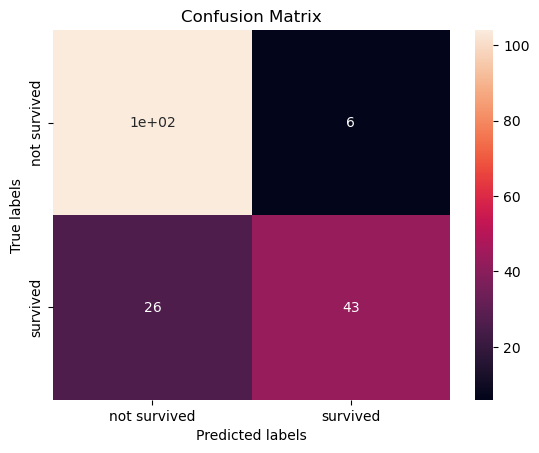

In [93]:
dtc_param = {'criterion': ['gini', 'entropy'],
            'splitter': ['best', 'random'],
            'max_depth': [None,50,100, 250],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 5, 10],
            'max_features': [None,'auto', 'log2'],
            'max_leaf_nodes': [None, 10, 20]
            }

# Defining Model

dtc_model = DecisionTreeClassifier()

# Create GridSearchCV
dtc_grid_search = GridSearchCV(estimator = dtc_model, param_grid = dtc_param, cv = 5, n_jobs = 4)

# Fit GridSearchCV

dtc_grid_search.fit(X_train, y_train)
best_params_dtc = dtc_grid_search.best_params_
accuracy_train_dtc = dtc_grid_search.best_score_

print("Best_Params_for Decision Tree Classifier Model: ", best_params_dtc)
print("Accuracy of Log Reg Model on Train Set :",accuracy_train_lg)

# Fitting with Best Parameters
best_dtc = DecisionTreeClassifier(**best_params_dtc)
best_dtc.fit(X_train, y_train)
y_dtc = best_dtc.predict(X_val)

# Metrics
accuracy_val_dtc = best_dtc.score(X_val, y_val)
mae_dtc = mean_absolute_error(y_val, y_dtc)
r2_dtc = r2_score(y_val, y_dtc)
print("Accuracy of DTC Model on Validation Data : ", accuracy_val_dtc)
print("Mean Absolute Error of DTC Model Predictions : ", mae_dtc)
print("R2 Score of DTC Model : ", r2_dtc)

# Confusion Matrix
plot_confusion_matrix(y_val, y_dtc)


### 3. Random Forest Classifier

Fitting 5 folds for each of 6 candidates, totalling 30 fits
RandomForestClassifier Best Params :  {'criterion': 'entropy', 'max_depth': 35, 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 200}
RandomForestClassifier Accuracy on train data : 0.8230276765488032
Accuracy of rfc Model on Validation Data :  0.8603351955307262
Mean Absolute Error of rfc Model Predictions :  0.13966480446927373
R2 Score of rfc Model :  0.4104084321475626


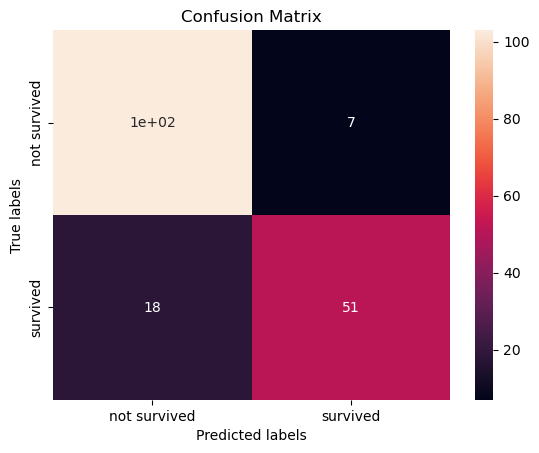

In [94]:
rfc_param = {
    'n_estimators': [200,195],
    'criterion': ['entropy'],
    'max_depth': [None, 35, 36],
    'min_samples_split': [8],
    'min_samples_leaf': [1],
}

# Defining Model

rfc_model = RandomForestClassifier()

# Grid Search

rfc_grid = GridSearchCV(estimator = rfc_model, param_grid = rfc_param, cv = 5, n_jobs = 3, verbose = 2)
rfc_grid.fit(X_train, y_train)

best_params_rfc = rfc_grid.best_params_
accuracy_train_rfc = rfc_grid.best_score_

print("RandomForestClassifier Best Params : ", best_params_rfc)
print("RandomForestClassifier Accuracy on train data :", accuracy_train_rfc)
      
# Fitting with Best Parameters
best_rfc = RandomForestClassifier(**best_params_rfc)
best_rfc.fit(X_train, y_train)
y_rfc = best_rfc.predict(X_val)

# Metrics
accuracy_val_rfc = best_rfc.score(X_val, y_val)
mae_rfc = mean_absolute_error(y_val, y_rfc)
r2_rfc = r2_score(y_val, y_rfc)
print("Accuracy of rfc Model on Validation Data : ", accuracy_val_rfc)
print("Mean Absolute Error of rfc Model Predictions : ", mae_rfc)
print("R2 Score of rfc Model : ", r2_rfc)

# Confusion Matrix
plot_confusion_matrix(y_val, y_rfc)      

### 4. Support Vector Classifier (SVC)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Params for SVC Model:  {'kernel': 'rbf', 'gamma': 'scale', 'degree': 4, 'C': 1}
Accuracy of SVC Model on Train Set : 0.8132177681473456
Accuracy of svc Model on Validation Data :  0.7988826815642458
Mean Absolute Error of svc Model Predictions :  0.2011173184357542
R2 Score of svc Model :  0.15098814229249014


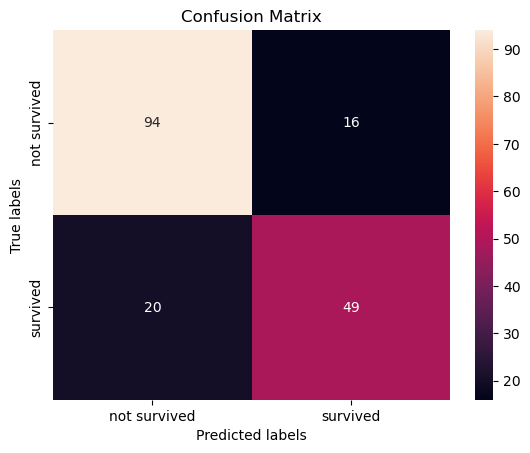

In [95]:
svm_param = {'kernel' : ['rbf'],
             'C' : [1, 100],
             'degree' : [2,3,4],
             'gamma' : ['scale', 'auto']
             }

# Defining Model
svc_model = SVC()

# Randomized Grid Search
svc_random_search = RandomizedSearchCV(estimator = svc_model, param_distributions = svm_param, cv = 5, n_jobs = 3, verbose = 2)
svc_random_search.fit(X_train, y_train)

best_params_svc= svc_random_search.best_params_
accuracy_train_svc = svc_random_search.best_score_
 
print("Best Params for SVC Model: ", best_params_svc)
print("Accuracy of SVC Model on Train Set :",accuracy_train_svc)

# Fitting with Best Parameters
best_svc = SVC(**best_params_svc)

best_svc.fit(X_train, y_train)
y_svc = best_svc.predict(X_val)

# Metrics
accuracy_val_svc = best_svc.score(X_val, y_val)
mae_svc = mean_absolute_error(y_val, y_svc)
r2_svc = r2_score(y_val, y_svc)
print("Accuracy of svc Model on Validation Data : ", accuracy_val_svc)
print("Mean Absolute Error of svc Model Predictions : ", mae_svc)
print("R2 Score of svc Model : ", r2_svc)

# Confusion Matrix
plot_confusion_matrix(y_val, y_svc)      

### 5. K-Nearest Neighbors Classifier

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best Params for knn Model:  {'algorithm': 'auto', 'leaf_size': 2, 'n_neighbors': 11, 'weights': 'uniform'}
Accuracy of knn Model on Train Set : 0.7879444499162809
Accuracy of knn Model on Validation Data :  0.8156424581005587
Mean Absolute Error of knn Model Predictions :  0.18435754189944134
R2 Score of knn Model :  0.22173913043478266


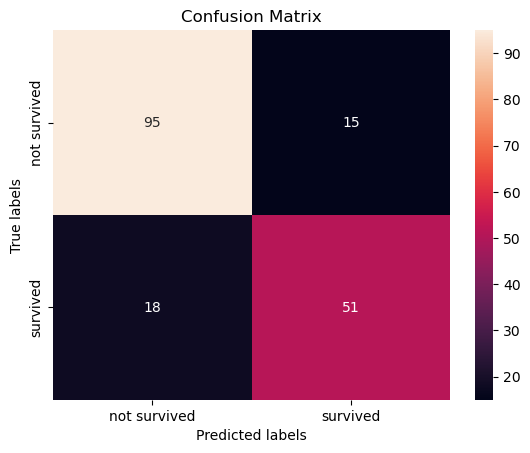

In [96]:
knn_params = {
    'n_neighbors': [11, 13],
    'weights': ['uniform'],
    'algorithm': ['auto'],
    'leaf_size': [2]}

# Defining model
knn_model = KNeighborsClassifier()

# Grid Search
knn_grid = GridSearchCV(estimator = knn_model, cv = 5, n_jobs = 3, param_grid = knn_params, verbose = 3)
knn_grid.fit(X_train, y_train)

best_params_knn = knn_grid.best_params_
accuracy_train_knn = knn_grid.best_score_

print("Best Params for knn Model: ", best_params_knn)
print("Accuracy of knn Model on Train Set :",accuracy_train_knn)

# Fitting with Best Parameters
best_knn = KNeighborsClassifier(**best_params_knn)
best_knn.fit(X_train, y_train)
y_knn = best_knn.predict(X_val)

# Metrics
accuracy_val_knn = best_knn.score(X_val, y_val)
mae_knn = mean_absolute_error(y_val, y_knn)
r2_knn = r2_score(y_val, y_knn)
print("Accuracy of knn Model on Validation Data : ", accuracy_val_knn)
print("Mean Absolute Error of knn Model Predictions : ", mae_knn)
print("R2 Score of knn Model : ", r2_knn)

# Confusion Matrix
plot_confusion_matrix(y_val, y_knn)      

### 6. XGBoost

Fitting 5 folds for each of 8 candidates, totalling 40 fits
XGB Best Params :  {'booster': 'gbtree', 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 25}
XGB Accuracy :  0.8328178863390132
Accuracy of xgb Model on Validation Data :  0.8603351955307262
Mean Absolute Error of xgb Model Predictions :  0.13966480446927373
R2 Score of xgb Model :  0.4104084321475626


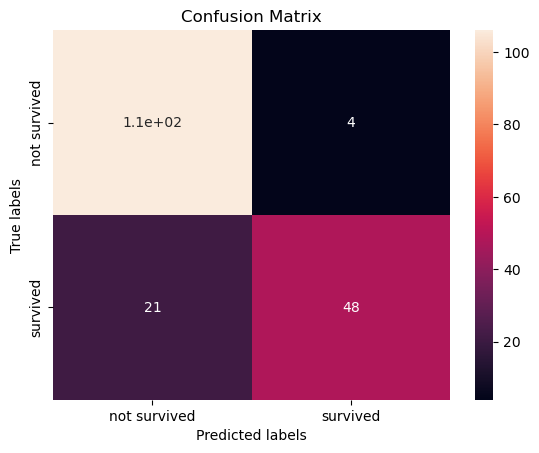

In [97]:
xgb_param = {
    'booster': ['gbtree'],
    'n_estimators': [25,50],
    'max_depth': [4, 6],
    'learning_rate': [0.1, 0.15]
}

# Model
xgb = XGBClassifier()

# GridSearch

xgb_grid = GridSearchCV(estimator = xgb, param_grid = xgb_param, cv = 5, n_jobs = 3, verbose = 3)
xgb_grid.fit(X_train, y_train)

best_params_xgb = xgb_grid.best_params_
accuracy_train_xgb = xgb_grid.best_score_

print("XGB Best Params : ", best_params_xgb)
print("XGB Accuracy : ", accuracy_train_xgb)

# Fitting with Best Parameters
best_xgb = XGBClassifier(**best_params_xgb)
best_xgb.fit(X_train, y_train)
y_xgb = best_xgb.predict(X_val)

# Metrics
accuracy_val_xgb = best_xgb.score(X_val, y_val)
mae_xgb = mean_absolute_error(y_val, y_xgb)
r2_xgb = r2_score(y_val, y_xgb)
print("Accuracy of xgb Model on Validation Data : ", accuracy_val_xgb)
print("Mean Absolute Error of xgb Model Predictions : ", mae_xgb)
print("R2 Score of xgb Model : ", r2_xgb)

# Confusion Matrix
plot_confusion_matrix(y_val, y_xgb)      

In [98]:
# Comparison
hyper_score_dic = {'LOG REG':[accuracy_train_lg, accuracy_val_lg, mae_lg, r2_lg],
                  'DTC': [accuracy_train_dtc, accuracy_val_dtc, mae_dtc, r2_dtc],
                  'SVC': [accuracy_train_svc, accuracy_val_svc, mae_svc, r2_svc],
                  'RFC': [accuracy_train_rfc, accuracy_val_rfc, mae_rfc, r2_rfc],
                  'KNN': [accuracy_train_knn, accuracy_val_knn, mae_knn, r2_knn],
                  'XGB': [accuracy_train_xgb, accuracy_val_xgb, mae_xgb, r2_xgb]}
hyper_score_df = pd.DataFrame(hyper_score_dic, index = ['Accuracy on Train Data','Accuracy on Validation', 'MAE', 'R2 Score'])
hyper_score_df

,LOG REG,DTC,SVC,RFC,KNN,XGB
Accuracy on Train Data,0.811829,0.832828,0.813218,0.823028,0.787944,0.832818
Accuracy on Validation,0.821229,0.821229,0.798883,0.860335,0.815642,0.860335
MAE,0.178771,0.178771,0.201117,0.139665,0.184358,0.139665
R2 Score,0.245323,0.245323,0.150988,0.410408,0.221739,0.410408


From the above comparison, we understand that, RandomForestClassifier and XGBoostClassifier are the best performing models for the problem.
They shows good accuracy scores on data, minimum MAE value and best R² score.

An R² score (also known as the coefficient of determination) of 0.41 indicates that the RFC and XGB models explain 41% of the variance in the target variable based on the features provided.

# Pipelining the Models - RFC and XGB

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Metric
from sklearn.metrics import mean_absolute_error, accuracy_score, r2_score
from sklearn.model_selection import cross_val_score

# Model
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier


In [100]:
# Data Importing

train_path = "D:/Coursera/Kaggle/Datasets/titanic/train.csv"
test_path = "D:/Coursera/Kaggle/Datasets/titanic/test.csv"


train_data = pd.read_csv(train_path, index_col = 'PassengerId')
test_data = pd.read_csv(test_path, index_col = 'PassengerId')

In [101]:
# Engineered Features

# Age
train_data['Age_group'] = pd.cut(train_data['Age'], 
                                 bins = [0,6,15,23,36,55,63,80],
                                 labels = ['0-6', '6-15','15-23','23-36','36-55','55-63','63-80'], 
                                 include_lowest = True)

test_data['Age_group'] = pd.cut(test_data['Age'], 
                                 bins = [0,6,15,23,36,55,63,80],
                                 labels = ['0-6', '6-15','15-23','23-36','36-55','55-63','63-80'], 
                                 include_lowest = True)

#Fare
train_data['Fare_group'] = pd.cut(train_data['Fare'],
                               bins = [0,8, 14, 31,513],
                                  labels = ['low_fare', 'medium_fare', 'high_fare', 'very_high_fare'],
                               include_lowest = True)

test_data['Fare_group'] = pd.cut(test_data['Fare'],
                               bins = [0,8, 14, 31,513],
                                  labels = ['low_fare', 'medium_fare', 'high_fare', 'very_high_fare'],
                               include_lowest = True)

# Relatives

train_data['Relatives'] = train_data['SibSp'] + train_data['Parch']
test_data['Relatives'] = test_data['SibSp'] + test_data['Parch']


In [102]:
# Feature Selection and Target Separation
features = ['Pclass', 'Parch', 'Age_group', 'Fare_group', 'Embarked', 'Sex', 'Fare', 'Relatives']


X = train_data.copy()
y = X.pop('Survived')

X = X[features]

# Distinguishing Categorical Features and Numerical Features
cat_cols = [col for col in X.columns if X[col].dtypes in ['object', 'category']]
num_cols = [col for col in X.columns if X[col].dtypes in ['int64', 'float64']]


# Splitting data into train and test sets
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 0)

In [103]:
# Defining pipelining process

# Numerical data processing
num_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy = 'mean')),
     ('scaler', preprocessing.StandardScaler())
])

#num_transformer = Pipeline(steps = [
#    ('imputer', SimpleImputer(strategy = 'median'))
#])

# Categorical data processing
cat_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy = 'most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown = 'ignore', sparse_output = False))
])

# Bundling Preprocessing

preprocessor = ColumnTransformer(transformers = [
    ('num', num_transformer, num_cols),
    ('cat', cat_transformer, cat_cols)
])

### 1. XGB

In [104]:
# Defining model

xgb_best_para = {'booster': 'gbtree', 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 25}
xgb = XGBClassifier(**xgb_best_para)

# Pipeline

xgb_pipeline = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('model', xgb)
])

# Fit pipeline
xgb_pipeline.fit(X_train, y_train)
accuracy_train_xgb_pipe = xgb_pipeline.score(X_train, y_train)

print("Accuracy of XGB Pipeline on Train Data : ", accuracy_train_xgb_pipe)

# Predict on X_val
y_xgb = xgb_pipeline.predict(X_val)

# Metrics
mae_xgb_pipe = mean_absolute_error(y_val, y_xgb)
print("MAE Validation XGB : ", mae_xgb_pipe)

cv_score_xgb_pipe = cross_val_score(xgb_pipeline, X, y,
                           cv = 5,
                           scoring = 'accuracy').mean()
print('Cross validation accuracy is %.3f' % cv_score_xgb_pipe)

r2_xgb_pipe = r2_score(y_val, y_xgb)
print("R2 Score XGB : ", r2_xgb_pipe)

accuracy_val_xgb_pipe = accuracy_score(y_val, y_xgb)
print('Accuracy Score XGB : ', accuracy_val_xgb_pipe)

# Deploying model on test data
X_test = test_data[features].copy()
y_test_xgb = xgb_pipeline.predict(X_test)


Accuracy of XGB Pipeline on Train Data :  0.8679775280898876
MAE Validation XGB :  0.13966480446927373
Cross validation accuracy is 0.829
R2 Score XGB :  0.4104084321475626
Accuracy Score XGB :  0.8603351955307262


### 2. RFC

In [105]:
# Defining model

rfc_best_params =  {'criterion': 'entropy', 'max_depth': 36, 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 195}
rfc = RandomForestClassifier(**rfc_best_params, random_state = 0)

# Pipeline

rfc_pipeline = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('model', rfc)
])

# Fit pipeline
rfc_pipeline.fit(X_train, y_train)

accuracy_train_rfc_pipe = rfc_pipeline.score(X_train, y_train)
print("Accuracy of RFC Pipeline on Train Data : ", accuracy_train_rfc_pipe)

# Predict on X_val
y_rfc = rfc_pipeline.predict(X_val)

# Metrics
mae_rfc_pipe = mean_absolute_error(y_val, y_rfc)
print("MAE Validation rfc : ", mae_rfc_pipe)

cv_score_rfc_pipe = cross_val_score(rfc_pipeline, X, y,
                           cv = 5,
                           scoring = 'accuracy').mean()
print('Cross validation accuracy is %.3f' % cv_score_rfc_pipe)

r2_rfc_pipe = r2_score(y_val, y_rfc)
print("R2 Score rfc : ", r2_rfc_pipe)

accuracy_val_rfc_pipe = accuracy_score(y_val, y_rfc)
print('Accuracy Score RFC on Validation Data : ', accuracy_val_rfc_pipe)

# Deploying model on test data
X_test = test_data[features].copy()
y_test_rfc = rfc_pipeline.predict(X_test)

Accuracy of RFC Pipeline on Train Data :  0.8848314606741573
MAE Validation rfc :  0.13966480446927373
Cross validation accuracy is 0.827
R2 Score rfc :  0.4104084321475626
Accuracy Score RFC on Validation Data :  0.8603351955307262


In [106]:
scores = {'XGB': [cv_score_xgb_pipe, mae_xgb_pipe, r2_xgb_pipe, accuracy_val_xgb_pipe,accuracy_train_xgb_pipe], 
         'RFC': [cv_score_rfc_pipe, mae_rfc_pipe, r2_rfc_pipe, accuracy_val_rfc_pipe, accuracy_train_rfc_pipe]}
scores_df = pd.DataFrame(scores, index = ['CV Score', 'MAE Validation', 'R2 Score', 'Accuracy on Train','Accuracy on Validation'])
scores_df

,XGB,RFC
CV Score,0.829396,0.827180
MAE Validation,0.139665,0.139665
R2 Score,0.410408,0.410408
Accuracy on Train,0.860335,0.860335
Accuracy on Validation,0.867978,0.884831


In [107]:
# Output

output_git_xgb = pd.DataFrame({'PassengerID': test_data.index, 'Survived': y_test_xgb})
output_git_xgb.to_csv('submission_xgb.csv', index = False)

output_git_rfc = pd.DataFrame({'PassengerID': test_data.index, 'Survived': y_test_rfc})
output_git_rfc.to_csv('submission_rfc.csv', index = False)

## Final Interpretations

- __Consistency Across Metrics:__ The model shows consistent performance across different metrics, with good accuracy on both the training and validation sets. The cross-validation scores also reflect a stable model.

- __Moderate R² Score:__ The R² score suggests that the model is moderately effective at explaining the variance in the data, though there might be opportunities to improve it.

- __Low MAE:__ The relatively low MAE indicates that the model’s predictions are close to the actual values, which is positive.